     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
Binary Classification Accuracy: 0.8


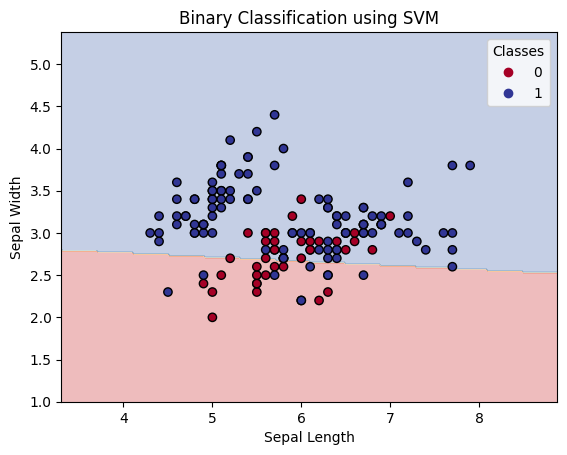

Multi-Class Classification Accuracy: 0.9666666666666667


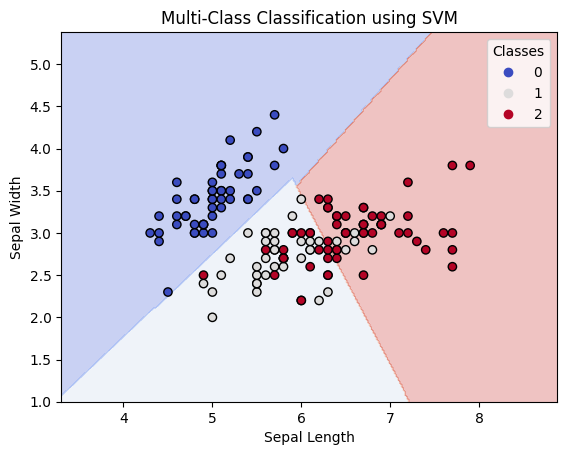

Binary SVM Accuracy: 0.8
Multi-Class SVM Accuracy: 0.9666666666666667


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

iris = pd.read_csv('iris.csv')
print(iris)

iris['v_nv'] = iris['species'].apply(lambda x: 0 if x == 'versicolor' else 1)

X = iris.drop(columns=['species', 'v_nv'])  
y = iris['v_nv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Binary Classification Accuracy:", accuracy)

X_vis = iris[['sepal_length', 'sepal_width']].values
y_vis = iris['v_nv'].values
svm_vis = SVC(kernel='linear')
svm_vis.fit(X_vis, y_vis)

def plot_decision_regions(X, y, classifier, resolution=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', marker='o')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('Binary Classification using SVM')
    plt.show()

plot_decision_regions(X_vis, y_vis, classifier=svm_vis)

le = LabelEncoder()
iris['species_encoded'] = le.fit_transform(iris['species'])

X_multi = iris.drop(columns=['species', 'species_encoded', 'v_nv'])
y_multi = iris['species_encoded']

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_multi = SVC(kernel='linear', decision_function_shape='ovr')  # One-vs-Rest
svm_multi.fit(X_train, y_train)

y_pred_multi = svm_multi.predict(X_test)

accuracy_multi = accuracy_score(y_test, y_pred_multi)
print("Multi-Class Classification Accuracy:", accuracy_multi)

X_vis_multi = iris[['sepal_length', 'sepal_width']].values
y_vis_multi = iris['species_encoded'].values

svm_vis_multi = SVC(kernel='linear', decision_function_shape='ovr')
svm_vis_multi.fit(X_vis_multi, y_vis_multi)

def plot_decision_regions_multi(X, y, classifier, resolution=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', marker='o')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('Multi-Class Classification using SVM')
    plt.show()

plot_decision_regions_multi(X_vis_multi, y_vis_multi, classifier=svm_vis_multi)


print("Binary SVM Accuracy:", accuracy)
print("Multi-Class SVM Accuracy:", accuracy_multi)
